### import

In [24]:
import geopandas

# Viewing points created with geojson

In [27]:
points_df = geopandas.read_file('denmark_pop_1k.json')

points_df['lon'] = points_df['geometry'].x
points_df['lat'] = points_df['geometry'].y

points_df

,data,geometry,lon,lat
0,0.218567,POINT (10.58625 57.75375),10.586250,57.753750
1,0.512380,POINT (10.59458 57.75375),10.594583,57.753750
2,0.716782,POINT (10.60292 57.75375),10.602917,57.753750
3,0.992388,POINT (10.61125 57.75375),10.611250,57.753750
4,0.872486,POINT (10.61958 57.75375),10.619583,57.753750
...,...,...,...,...
94672,0.296320,POINT (11.94458 54.56208),11.944583,54.562083
94673,2.932083,POINT (11.95292 54.56208),11.952917,54.562083
94674,1.779469,POINT (11.96125 54.56208),11.961250,54.562083
94675,3.801397,POINT (11.96958 54.56208),11.969583,54.562083


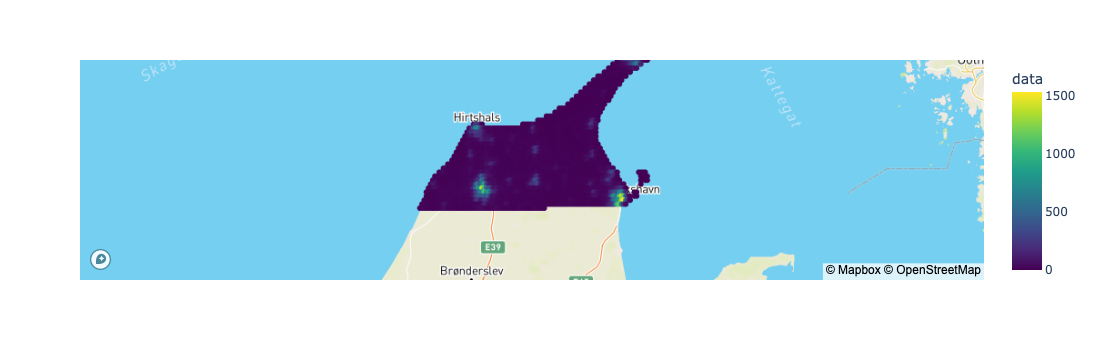

In [63]:
fig = px.scatter_mapbox(points_df.head(2000), lat="lat", lon="lon", color="data",
                  color_continuous_scale="Viridis", size_max=5, 
                        mapbox_style="outdoors",
                           center = {"lon":10.18, "lat": 57.5}, 
                           zoom = 7.5)

fig.show()

fig.write_image("points.png")

# Viewing polygons created with GeoJson & csv data

In [34]:
import geojson

filename="dk_polygons_1k"

with open(f'{filename}.json') as f:
    gj = geojson.load(f)

gj_features = gj.features

In [35]:
import pandas as pd

poly_df = pd.read_csv(f'{filename}.csv')
poly_df

,Unnamed: 0,population_density,id,geometry
0,0,0.218567,0,"POLYGON ((10.58208329189724 57.74958328448848,..."
1,1,0.512380,1,"POLYGON ((10.59041662519724 57.74958328448848,..."
2,2,0.716782,2,"POLYGON ((10.59874995849724 57.74958328448848,..."
3,3,0.992388,3,"POLYGON ((10.60708329179724 57.74958328448848,..."
4,4,0.872486,4,"POLYGON ((10.61541662509724 57.74958328448848,..."
...,...,...,...,...
94672,94672,0.296320,94672,"POLYGON ((11.94041661979724 54.55791663058848,..."
94673,94673,2.932083,94673,"POLYGON ((11.94874995309724 54.55791663058848,..."
94674,94674,1.779469,94674,"POLYGON ((11.95708328639724 54.55791663058848,..."
94675,94675,3.801397,94675,"POLYGON ((11.96541661969724 54.55791663058848,..."


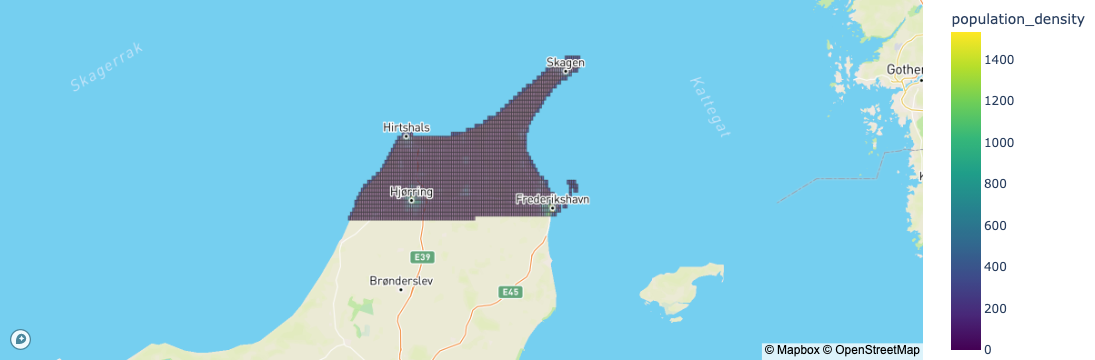

In [61]:
import pandas as pd
import geojson
import plotly.express as px


n = 2000

gj.features = gj_features[0:n]

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.choropleth_mapbox(poly_df[["population_density", "id"]].head(n), geojson=gj, 
                           locations='id',
                           featureidkey="properties.id",
                           color='population_density',
                           color_continuous_scale="Viridis",
                           #range_color=(0, poly_df["population_density"].head(n).max()),
                           mapbox_style="outdoors",
                           opacity=0.5,
                           center = {"lon":10.18, "lat": 57.5}, 
                           zoom = 7.5
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


# Display figure
fig.show()
fig.write_image("polygons.png")

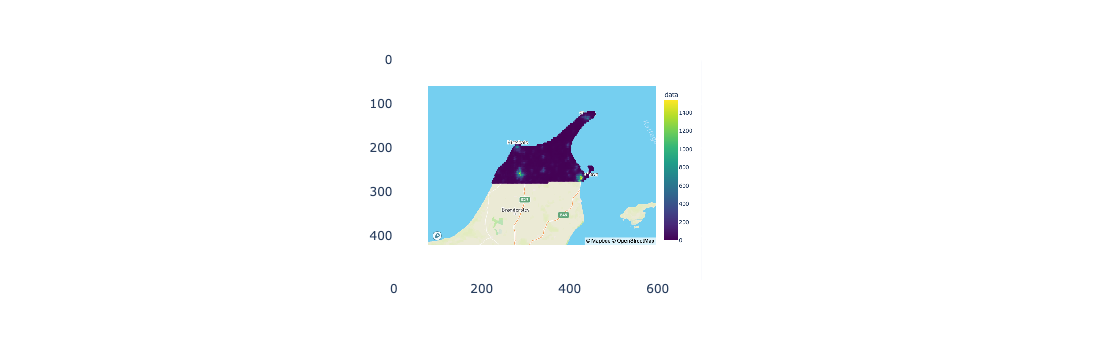

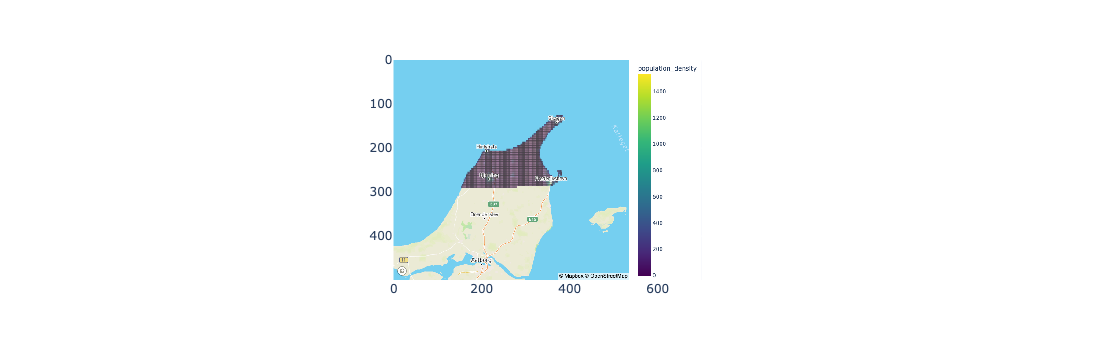

In [64]:
from skimage import io

fig = px.imshow(io.imread("points.png"))
fig.show()

fig = px.imshow(io.imread("polygons.png"))
fig.show()